<a href="https://colab.research.google.com/github/madhurjagdale/EDA-Capstone-MJ/blob/main/Final_Datazoids_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# Explore : Travel through (an unfamiliar area) in order to learn about it. 
## What is a single most important task for an explorer ? " When you travel into unknown lands to discover new part of the world, it is to ensure records of your discoveries are delivered back safe and sound, with or without you. Otherwise, it is all vein" An intruging line from a netflix movie 'Against the ice'

Exploration of data in data science is as important as the age of exploration (discovery) was for geography, history, science and  humanity. Age of exploration seeded the idea of globalization in true sense. Today one of the major challenges faced by the global world is terrorism. 

With access to The Global Terrorism Database our first task is to explore the data to really understand it and try to learn from it. 
We really dont know what we gonna find out but, we very excited!


So here go !

# Lets begin with rituals !

In [104]:
# Though it's not mandetory still, it always has to be np and pd.!

import numpy as np
import pandas as pd

In [105]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
# Loading the csv file containing data
df=pd.read_csv('/content/drive/MyDrive/EDA Capstone MJ/Global Terrorism Data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# As we have the data now, lets see what's in it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


## This .info() didn't really show the basic information about our dataframe as expected. So we had to do some exploration on google to be able to view elaborate basic information.

In [109]:
# Below code gave us the info of all colums, their data types and null values. 
# Only df.info(verbose = True) gives all columns but doesn't show count of null values
df.info(verbose = True,null_counts = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

null_counts is deprecated. Use show_counts instead



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

# 135 columns of data with with acronymed headers. 
## Looks like we need to read all 135 column names try to figure out what data they are really storing.

In [110]:
# This was supposed to show us name of all columns but, looks like we need to again take help from google.
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [111]:
# Basic
df.shape

(181691, 135)

In [112]:
# Thats a lot of data
df.size

24528285

In [113]:
# This is supposed to show first 5 rows of dataframe which it did but while hiding many many columns in middle.
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [114]:
# So this is what we had to do to get all the columns, just say 'display.max_columns'
pd.set_option('display.max_columns', None)

In [115]:
# And yes we are able to see all columns. Feels quite like an explorer !
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [116]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

# Data Preperation and Cleaning
## After a tedious task of veiwing content of each of 135x column just through head and tail and correlating with basic information about type of data and null values. We had to pick the columns which seemed to have more relevent and readable information.
## So in below code we picked the column names for use in our further exploration and analys.

In [117]:
# Just lis of column names handpicked from complete df
columns_to_use = ['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'success' , 'suicide' ,'attacktype1', 'attacktype1_txt' , 'targtype1_txt', 'gname' , 'weaptype1_txt' , 'weapsubtype1_txt' , 'nkill', 'nwound', 'propextent_txt' , 'propvalue' , 'ransompaid'  ]

In [118]:
# So we are going ahead with total 19 columns
len(columns_to_use)

19

# Creating new data frame for further use with 'columns_to_use' 

In [119]:
# Passing a list of shortlisted columns names into new_df
new_df = df[columns_to_use]

In [120]:
# Just reading out the basic information of new df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   country_txt       181691 non-null  object 
 5   region_txt        181691 non-null  object 
 6   success           181691 non-null  int64  
 7   suicide           181691 non-null  int64  
 8   attacktype1       181691 non-null  int64  
 9   attacktype1_txt   181691 non-null  object 
 10  targtype1_txt     181691 non-null  object 
 11  gname             181691 non-null  object 
 12  weaptype1_txt     181691 non-null  object 
 13  weapsubtype1_txt  160923 non-null  object 
 14  nkill             171378 non-null  float64
 15  nwound            165380 non-null  float64
 16  propextent_txt    64

In [121]:
# Lets raname column names to familiar names
new_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country', 'region_txt':'Region', 'success': 'Success',
                       'attacktype1_txt':'Type_Of_Attack','targtype1_txt':'Target_Group', 'gname':'Terrorist_Group', 'weaptype1_txt' : 'Weapons' , 'weapsubtype1_txt': 'weapsubtype' , 'nkill':'Killed',
                       'nwound':'Wounded','propextent_txt':'Property_Dam','propvalue':'Damage_To_Prop','ransompaid':'ransompaid'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [122]:
# Lets see if last code did work 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   Year             181691 non-null  int64  
 2   Month            181691 non-null  int64  
 3   Day              181691 non-null  int64  
 4   Country          181691 non-null  object 
 5   Region           181691 non-null  object 
 6   Success          181691 non-null  int64  
 7   suicide          181691 non-null  int64  
 8   attacktype1      181691 non-null  int64  
 9   Type_Of_Attack   181691 non-null  object 
 10  Target_Group     181691 non-null  object 
 11  Terrorist_Group  181691 non-null  object 
 12  Weapons          181691 non-null  object 
 13  weapsubtype      160923 non-null  object 
 14  Killed           171378 non-null  float64
 15  Wounded          165380 non-null  float64
 16  Property_Dam     64065 non-null   obje

# Some more datacleaning in below 2 cells

In [123]:
#cleaning up the NaN values.
new_df['Country'].fillna('Unknown',inplace=True)
new_df['Region'].fillna('Unknown',inplace=True)
new_df['Success'].fillna('Unknown',inplace=True)
new_df['Type_Of_Attack'].fillna('Unknown',inplace=True)
new_df['Target_Group'].fillna('Unknown',inplace=True)
new_df['Terrorist_Group'].fillna('Unknown',inplace=True)
new_df['Weapons'].fillna('Unknown',inplace=True)
new_df['weapsubtype'].fillna('Unknown',inplace=True)
new_df['Killed'].fillna(0,inplace=True)
new_df['Wounded'].fillna(0,inplace=True)
new_df['Damage_To_Prop'].fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [124]:
# getting rid of negative values in Damage_To_Prop
new_df.Damage_To_Prop = np.where(new_df.Damage_To_Prop<0,0,new_df.Damage_To_Prop)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
# Checking if above code worked
new_df.Damage_To_Prop.min()

0.0

In [126]:
# Count of reported terrorist events.
new_df.eventid.nunique()

181691

In [127]:
# Finding count of unique values in country column.
new_df.Country.nunique()

205

# There are 205 countries in data

In [128]:
# Reading unique values in country column.
new_df.Country.unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [129]:
# Lets see the country wise number of attacks.
new_df['Country'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

# The Country with highest number of terrorist attacks

In [130]:
# So below code gives coutry with highst number of terrorist events
print('Most affected country:', new_df['Country'].value_counts().idxmax())

Most affected country: Iraq


In [131]:
# Finding count of unique values in region_txt column.
new_df.Region.nunique()

12

# 12 Gergraphical regions. Considering large of count of countries, geographical region seems easier option to explore geaugraphy wise proporties of availble data

In [132]:
# Lets see what are 12 regions.
new_df.Region.unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [133]:
# And here we can see region wise number of reported events
new_df.Region.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [134]:
# Attack percetnage in South Asia
perc_of_attacks_on_south_asia = (new_df.Region[new_df.Region=='South Asia'].value_counts()) / new_df.eventid.nunique() *100
perc_of_attacks_on_south_asia

South Asia    24.753015
Name: Region, dtype: float64

In [135]:
# killings in South Asia
new_df.Killed[new_df.Region=='South Asia'].sum() / new_df.Killed.sum() *100

24.599871803587558

In [136]:
# Middle East & North Africa is region with maximum events, lets create a dataframe for same and see properties of this continent
df_middle_east_asia = new_df[new_df.Region == 'Middle East & North Africa']

In [137]:
df_middle_east_asia.head()

,eventid,Year,Month,Day,Country,Region,Success,suicide,attacktype1,Type_Of_Attack,Target_Group,Terrorist_Group,Weapons,weapsubtype,Killed,Wounded,Property_Dam,Damage_To_Prop,ransompaid
95,197002280001,1970,2,28,Jordan,Middle East & North Africa,1,0,2,Armed Assault,Tourists,Unknown,Firearms,Automatic or Semi-Automatic Rifle,0.0,0.0,Unknown,0.0,NaN
133,197003140002,1970,3,14,Egypt,Middle East & North Africa,1,0,3,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,Unknown Explosive Type,0.0,2.0,Unknown,0.0,NaN
158,197003290002,1970,3,29,Lebanon,Middle East & North Africa,1,0,3,Bombing/Explosion,Government (Diplomatic),Popular Front for the Liberation of Palestine ...,Explosives,Unknown Explosive Type,0.0,0.0,NaN,0.0,NaN
195,197004150001,1970,4,15,Jordan,Middle East & North Africa,1,0,3,Bombing/Explosion,Government (Diplomatic),Popular Front for the Liberation of Palestine ...,Explosives,Unknown Explosive Type,0.0,0.0,Minor (likely < $1 million),100000.0,NaN
226,197004250001,1970,4,25,Turkey,Middle East & North Africa,1,0,3,Bombing/Explosion,Airports & Aircraft,Palestinians,Explosives,Unknown Explosive Type,0.0,0.0,NaN,0.0,NaN


In [138]:
df_middle_east_asia.Country.nunique()

23

In [139]:
# Lets see country wise reported events in Middle East & North Africa
df_middle_east_asia.Country.value_counts()

Iraq                        24636
Turkey                       4292
Yemen                        3347
Algeria                      2743
Egypt                        2479
Lebanon                      2478
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Israel                       2183
Iran                          684
Saudi Arabia                  371
Bahrain                       207
Jordan                        113
Tunisia                       109
Kuwait                         76
Morocco                        36
United Arab Emirates           22
Qatar                           7
North Yemen                     6
Western Sahara                  5
South Yemen                     2
International                   1
Name: Country, dtype: int64

# If we look at the percentage of events in Iraq with resepect to world and the region, it is evident Iraq has been the most affected country

In [140]:
# Percentage of attacks in Iraq with respect to world

perc_of_attacks_on_Iraq = (new_df.Country[new_df.Country=='Iraq'].value_counts()) / new_df.eventid.nunique() *100
perc_of_attacks_on_Iraq

Iraq    13.559285
Name: Country, dtype: float64

In [141]:
# Percentage of attacks in Iraq with respect to region of Middle east asia and Africa
perc_of_attacks_on_Iraq_wrt_region =(new_df.Country[new_df.Country=='Iraq'].value_counts()) / df_middle_east_asia.eventid.nunique() *100
perc_of_attacks_on_Iraq_wrt_region

Iraq    48.809288
Name: Country, dtype: float64

# If we look at the number of killings in Iraq and total number of reported killings, we find huge difference. Probably number of killings in Iraq were not reported only.

In [142]:
print(new_df.loc[new_df['Killed'].idxmax(),'Country'],'is the most affected country with number of people killed',new_df.Killed[new_df.Country=='Iraq'].sum())

Iraq is the most affected country with number of people killed 78589.0


In [143]:
new_df.Killed[new_df.Country=='Iraq'].sum()

78589.0

In [144]:
# Total Reported killings in world from 1970 to 2017
new_df.Killed.sum()

411868.0

## Out of 205 counties in the world The percentage of of people killed only in Iraq is more than 19% of overall reported killings

In [145]:
Perc_killing_in_Middle_east_Africa= new_df.Killed[new_df.Region=='Middle East & North Africa'].sum() / new_df.Killed.sum() *100
Perc_killing_in_Middle_east_Africa

33.418959472452336

In [146]:
# Percantage of people killed only in Iraq compated to overall killings
Perc_killing_in_Iraq= new_df.Killed[new_df.Country=='Iraq'].sum() / new_df.Killed.sum() *100
Perc_killing_in_Iraq

19.081113366418368

In [147]:
Perc_killing_in_Iraq_wrt_region=new_df.Killed[new_df.Country=='Iraq'].sum() / new_df.Killed[new_df.Region=='Middle East & North Africa'].sum() *100
Perc_killing_in_Iraq_wrt_region

57.09667107423606

# Type of Terrorist attacks

In [148]:
# Unique values in type of attack
new_df.Type_Of_Attack.unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [149]:
# Combining 2x types of Hostage Taking into one for further analysis
new_df['Type_Of_Attack'] = new_df['Type_Of_Attack'].replace(['Hostage Taking (Kidnapping)','Hostage Taking (Barricade Incident)'],['Hostage Taking','Hostage Taking'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
# Just checking if previous code did the job
new_df.Type_Of_Attack.unique()

array(['Assassination', 'Hostage Taking', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking',
       'Unknown', 'Unarmed Assault'], dtype=object)

In [151]:
# Lets check out what have bin the top targets of terrorist
new_df.Target_Group.unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [152]:
# Count of different targets of terrorists
new_df.Target_Group.nunique()

22

##%matplotlib inline sets the backend of matplotlib to the 'inline' backend
With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [153]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

# Importing Worldcloud

In [154]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [155]:
from datetime import datetime

# Importing matplotlib.pyplot 
import matplotlib.pyplot as plt
%matplotlib inline

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

In [156]:
# importing seaborn for plotting
import seaborn as sns
import plotly.express as px

In [157]:
# importing plotly
import plotly.graph_objects as go

# Lets see year on year trend of attacks

In [158]:
# Finding yearly number of attacks
new_df['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

In [159]:
# Storing year wise attacks in a new dataframe
year_wise = new_df['Year'].value_counts()

In [160]:
# Sorting year wise 
year_wise.sort_index(inplace=True)

# **Global Visualization**


#Year On Year trend of reported attacks
It is evident from plot 2014 has been the worst affected year in terms of number of attacks and after that we are seeing gradual decline in coming years. From year 1997 to 1998 number of atatcks reduced by almost 1/3rd and attack counts were on nearly flat trend till 2004. 2004 onwards we see significant increase in terrorist activities.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

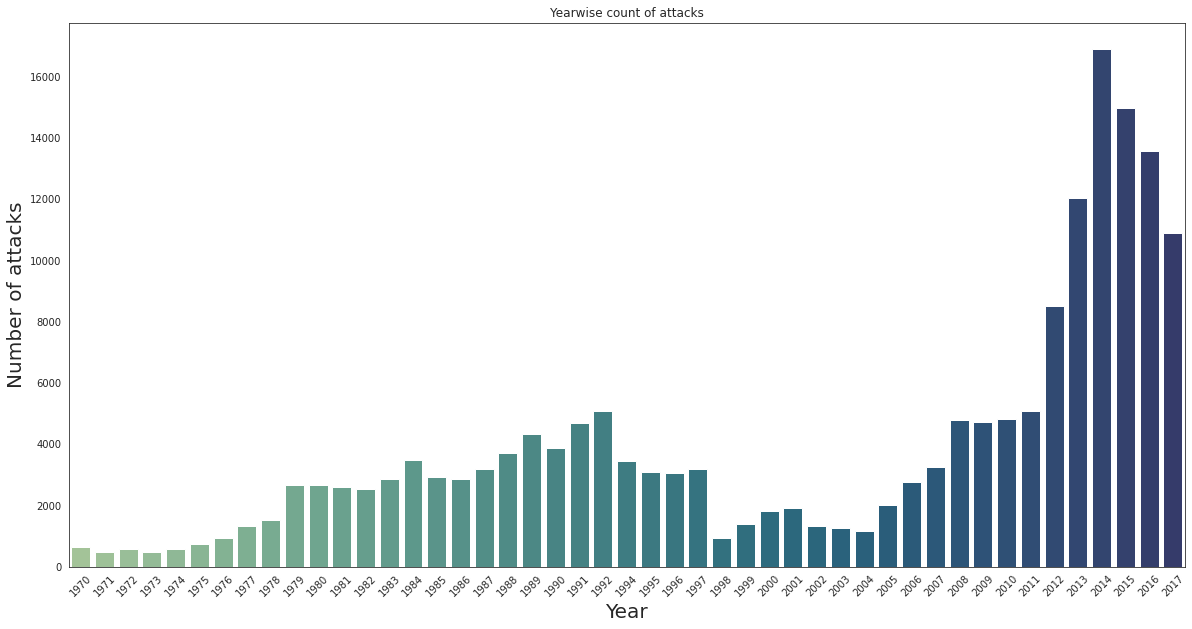

In [161]:
# Using Seaborn for plotting year on trend of number of attacks
sns.set_style('white')
plt.figure(figsize=(20,10))
plt.title("Yearwise count of attacks")
sns.countplot(x ='Year', data = new_df, palette='crest')
plt.ylabel('Number of attacks',size=20)
plt.xlabel('Year',size=20)
plt.xticks(rotation=45)

# Year on Year Trend of Succesful attacks

In [162]:
# Count of successful events out of reported ones.
new_df.Success.value_counts()

1    161632
0     20059
Name: Success, dtype: int64

In [163]:
# creating dataframe of year wise success/failure count 
year_wise_success=new_df.groupby(['Year','Success'])['Success'].count().unstack()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

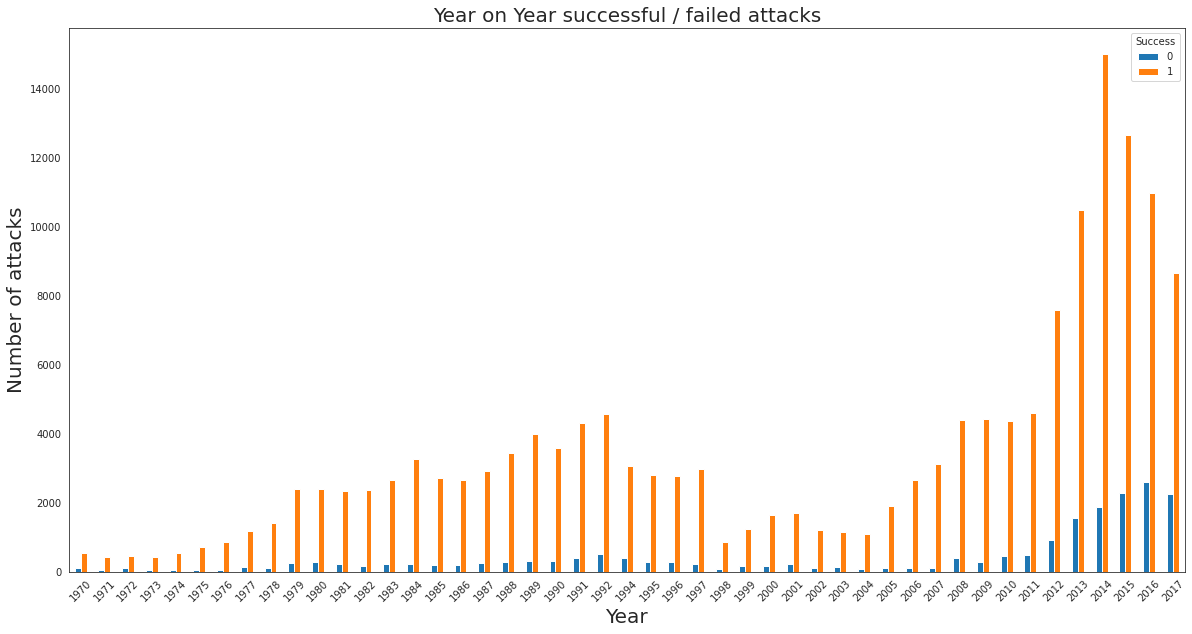

In [164]:
## Year wise success and unsuccessful

year_wise_success.plot(kind='bar',figsize=(20,10))
plt.title('Year on Year successful / failed attacks',size=20)
plt.ylabel('Number of attacks',size=20)
plt.xlabel('Year',size=20)
plt.xticks(rotation=45)

As seen previous graph 2014 onwards we see gradual decrease in number of attacks and from below trend of successful (=1) and unsuccessful(=0) over the years, 2014 onwards there has been gradual increase in unsuccessful attacks. This possibly because goverment agencies were able to neutralize attacks more efficiently.

---



# Terrorist Incidents World Map 1970 to 2017

In [165]:
country_Wise_attacks=pd.DataFrame({'country': new_df['Country'].value_counts().index,
'number_of_attacks': new_df['Country'].value_counts().values}) # creating a dataframe 
fig = px.choropleth(country_Wise_attacks, locations="country", # creating a plot figure
locationmode='country names', color="number_of_attacks",
hover_name="country", range_color=[1, 1000],
color_continuous_scale="reds",title='Number of terrorist attacks by country')
((fig.update(layout_coloraxis_showscale=True,)))
fig.show() 

## Above World Map is giving is clear picture on how terrorist has affected different parts of world and which are severely affected countries


------









# **Region wise trend of reported attacks over years**
## Graph area shows 'Middle east & North africa' and 'South Asia' are the regions with highest number terrorist activities

In [166]:
# Lets get some overview numbers before we plot the graph
new_df.Region.describe()

count                         181691
unique                            12
top       Middle East & North Africa
freq                           50474
Name: Region, dtype: object

In [167]:
# Creating a dataframe with regions and corrosponing frequnecy of attacks
region_freq=new_df.groupby('Region')['eventid'].count().reset_index()

In [168]:
region_dict={} #We'll use this dict to generate the wordcloud
for Region,eventid in zip(region_freq.Region,region_freq.eventid):
  region_dict[Region]=eventid

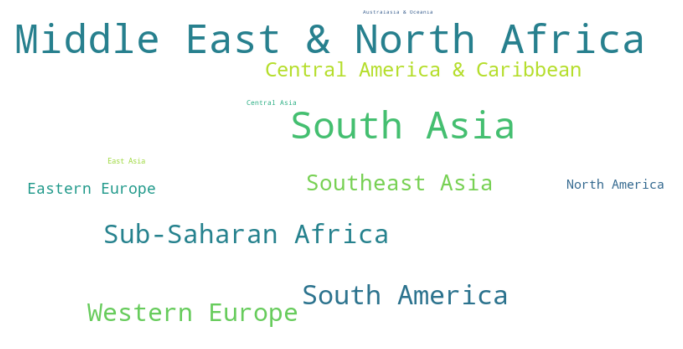

In [169]:
# With world cloud we see Iraq, Pakistan,Afganistan, India are most active conutries in terms of terrorist activities
wordcloud = WordCloud(background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=region_dict)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Text(0.5, 0, 'Year')

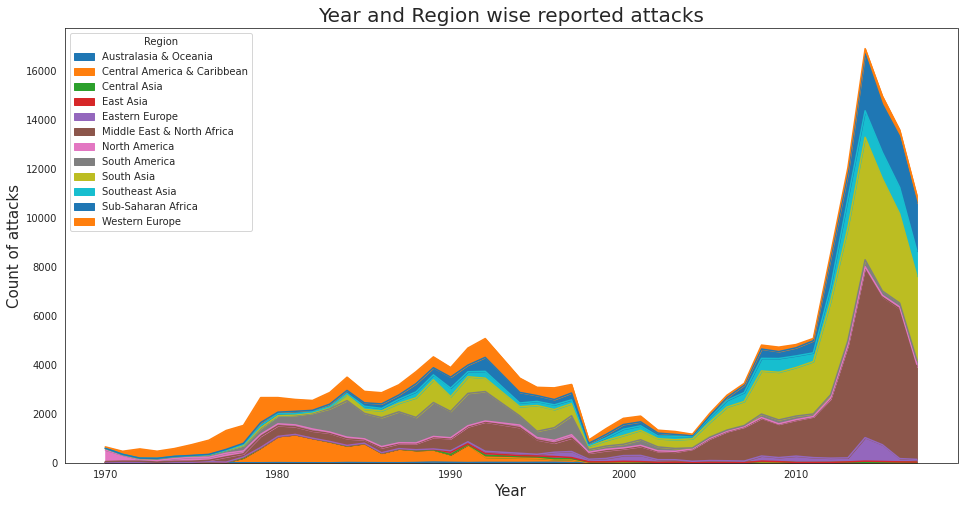

In [170]:
# Grouping the reported events count with year and region
year_region_wise_count=new_df.groupby(['Year','Region'])['Region'].count().unstack()
# Plotting region wise reported events year on year with plot type - area
year_region_wise_count.plot(kind='area',figsize=(16,8))
plt.title('Year and Region wise reported attacks',size=20)
plt.ylabel('Count of attacks',size=15)
plt.xlabel('Year',size=15)

# Top 5 regions terrorist activity over the period of 1970 to 2017

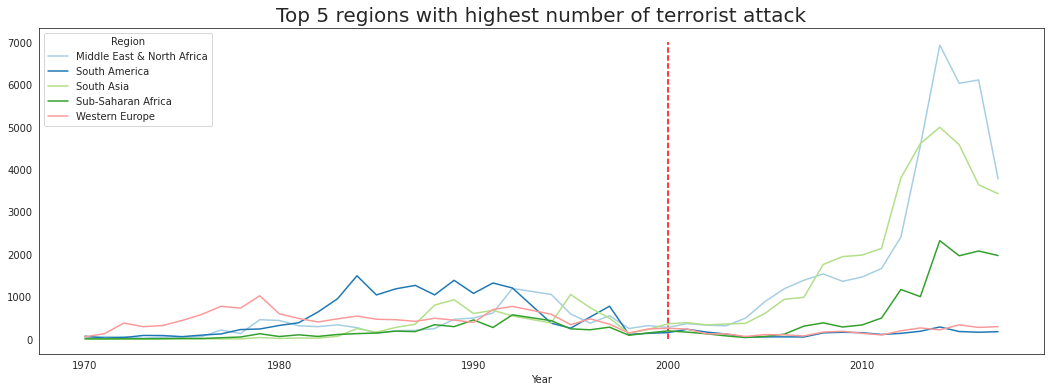

In [171]:
top_regions=new_df[new_df['Region'].isin(new_df['Region'].value_counts()[0:5].index)] # Filtering out top 5 regions with number of activites
pd.crosstab(top_regions.Year,top_regions.Region).plot(color=sns.color_palette('Paired',10)) # Plotting the line plot
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.vlines(x=2000,ymin=0,ymax=7000,colors='red',linestyles='--') # drawing a vertical dotted line to highlight trend shift
plt.title('Top 5 regions with highest number of terrorist attack',size=20)
plt.show()

# Key Observations from above 2 plots
## From 1970s to early 2000s south america and western europe were on higher for reported attacks however, after 2000s we see these 2 countries with very low reported attacks. 
## Post 2000s till 2017 we see tremendeous increase in terrorist activities in 'Middle east & North Africa', 'South Asia' and ' Sub-Saharan Africa'


---



# Region wise killings due to terrorist attacks

In [172]:
region_wise_killing=new_df.groupby(['Region'])['Killed'].sum().reset_index() # creating a region wise dataframe with number of killings
region_wise_killing=region_wise_killing.sort_values(by='Killed',ascending=True).reset_index() # sorting with number of killings
table_global0 = go.Figure(data=[go.Table(  #tabular representation
    header=dict(values=list(['Region', 'Killed']),
                fill_color='pink',
                align='center'),
    cells=dict(values=[region_wise_killing.Region, region_wise_killing.Killed],
               fill_color='lavender',
               align='center'))
])
table_global0.update_layout(width=500, height=600) # Setting layout of table
table_global0.show()

## A bar graph of region wise killing

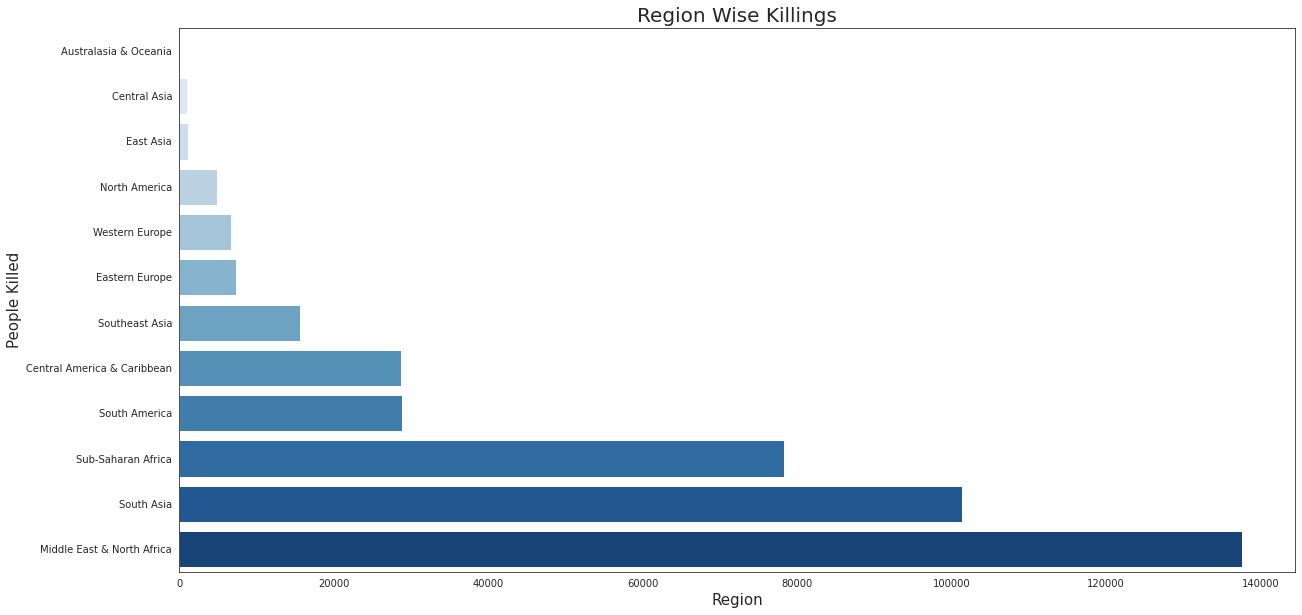

In [173]:
plt.subplots(figsize=(20,10))
sns.barplot(y ='Region', x='Killed', data = region_wise_killing, palette='Blues')
plt.title('Region Wise Killings',size=20)
plt.ylabel('People Killed',size=15)
plt.xlabel('Region',size=15)
plt.show()


# Overview of attacks on different countries

In [174]:
# Creating a dataframe with countries and corrosponing frequnecy of attacks
countr_freq=new_df.groupby('Country')['eventid'].count().reset_index()

In [175]:
country_dict={} #We'll use this dict to generate the wordcloud
for Country,eventid in zip(countr_freq.Country,countr_freq.eventid):
  country_dict[Country]=eventid

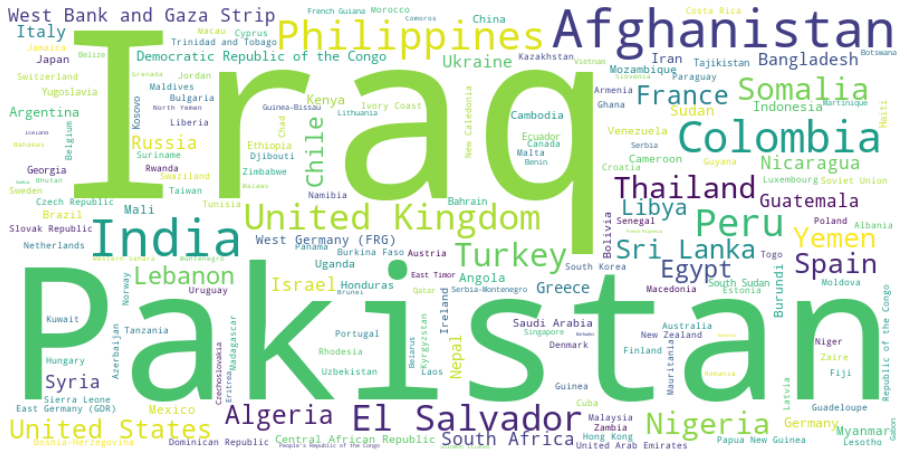

In [176]:
# With world cloud we see Iraq, Pakistan,Afganistan, India are most active conutries in terms of terrorist activities
wordcloud = WordCloud(background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=country_dict)
plt.figure(figsize = (16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Observations: Top countries with most frequent terrorist attacks
> Iraq

> Pakistan

> Afganistan

> India

# **Top 10 countries with terrorist activities**

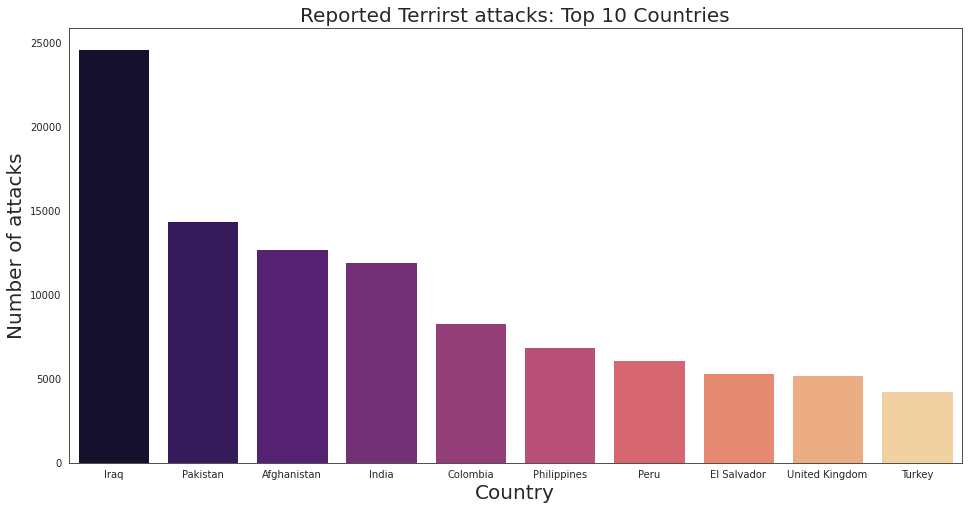

In [177]:
# Using seaborn for country wise (top 10) terrorist activities plot (number of reported attacks)
plt.subplots(figsize=(16,8))
sns.barplot(y=new_df['Country'].value_counts()[:10].values,x=new_df['Country'].value_counts()[:10].index,palette='magma')
plt.title('Reported Terrirst attacks: Top 10 Countries',size=20)
plt.ylabel('Number of attacks',size=20)
plt.xlabel('Country',size=20)
plt.show()

# **Top 10 countries with highest number of reported killings**



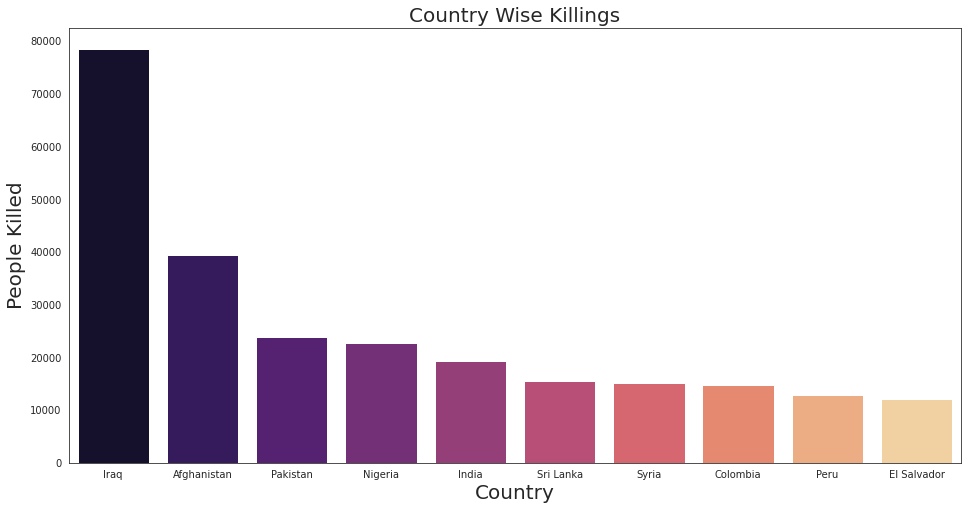

In [178]:
# Code for plotting top 10 countries with highest reported killings

kills = new_df.groupby(['Country'])['Killed'].sum().reset_index()

kills=kills.sort_values(by='Killed',ascending=False).reset_index()
kills=kills.head(10).sort_values(by='Killed',ascending=False)
plt.subplots(figsize=(16,8))
sns.barplot(x ='Country', y='Killed', data = kills, palette='magma')
plt.title('Country Wise Killings',size=20)
plt.ylabel('People Killed',size=20)
plt.xlabel('Country',size=20)
plt.show()


In [179]:
kills.Killed.sum() / 411868 * 100

61.69428069187215

## **Observations**
## Surpise : Phillipines, United Kingdom , Turkey these are 3 countries though in top 10 attacked countries, these countries are not in top 10 in terms of killings. Policy makers and intelligence agencies from other countries can study to understand reasons for lower number of deaths per attack in these countires. 
## Nigeria, Sri Lanka, Syria though not in top 10 attacked countries, these are 4th, 6th and 7th highest countries with reported killings.


---



# **Terrorist Group Wise activities**

In [180]:
# Basic propoerties of Terrorist group column
new_df.Terrorist_Group.describe()

count      181691
unique       3537
top       Unknown
freq        82782
Name: Terrorist_Group, dtype: object

There are total 3537 known terrorist groups 

In [181]:
gangwise_attacks= new_df.groupby(['Terrorist_Group'])['eventid'].count().reset_index()
gangwise_attacks=gangwise_attacks.sort_values(by='eventid',ascending=False).reset_index()
gangwise_attacks2=gangwise_attacks.drop(0) # Dropping unknown terrorist org from datafram
print('Average attacks per terrorist organization', round(gangwise_attacks2.eventid.mean(),0))
print('There are', gangwise_attacks2.Terrorist_Group[gangwise_attacks2.eventid<28].nunique(),'organizaition with less than 28 attacks')
print('There are', gangwise_attacks2.Terrorist_Group[gangwise_attacks2.eventid<5].nunique(),'organizaition with less than 5 attacks. Total attacks by them are',gangwise_attacks2.eventid[gangwise_attacks2.eventid<5].sum() )
print('There are', gangwise_attacks2.Terrorist_Group[gangwise_attacks2.eventid>1000].nunique(), 'large terrorist organizations that launched more than 1,000 terrorist attacks. Total attacks by them are', gangwise_attacks2.eventid[gangwise_attacks2.eventid>1000].sum() )
print('There are', gangwise_attacks2.Terrorist_Group[gangwise_attacks2.eventid>500].nunique() , 'large terrorist organizations that launched more than 1,000 terrorist attacks. Total attacks by them are', gangwise_attacks2.eventid[gangwise_attacks2.eventid>500].sum() )
print('There are', gangwise_attacks2.Terrorist_Group[gangwise_attacks2.eventid>100].nunique() , 'large terrorist organizations that launched more than 1,000 terrorist attacks. Total attacks by them are', gangwise_attacks2.eventid[gangwise_attacks2.eventid>100].sum() )

print('There are', gangwise_attacks2.Terrorist_Group[gangwise_attacks2.eventid>=5].nunique(),'organizaition with more than 5 attacks. Total attacks by them are',gangwise_attacks2.eventid[gangwise_attacks2.eventid>=5].sum() )

gangwise_attacks2.eventid.sum()

Average attacks per terrorist organization 28.0
There are 3230 organizaition with less than 28 attacks
There are 2600 organizaition with less than 5 attacks. Total attacks by them are 4038
There are 19 large terrorist organizations that launched more than 1,000 terrorist attacks. Total attacks by them are 50200
There are 32 large terrorist organizations that launched more than 1,000 terrorist attacks. Total attacks by them are 58520
There are 122 large terrorist organizations that launched more than 1,000 terrorist attacks. Total attacks by them are 78107
There are 936 organizaition with more than 5 attacks. Total attacks by them are 94871


98909

In [182]:
# Total number of people killed
new_df.Killed.sum()

411868.0

In [183]:
# Creating a dataframe for Terrorist orginzation wise reported killings

gangwise_kill= new_df.groupby(['Terrorist_Group'])['Killed'].sum().reset_index()
gangwise_kill=gangwise_kill.sort_values(by='Killed',ascending=False).reset_index()
gangwise_kill.head(10)

,index,Terrorist_Group,Killed
0,3408,Unknown,112367.0
1,1535,Islamic State of Iraq and the Levant (ISIL),38923.0
2,3138,Taliban,29410.0
3,704,Boko Haram,20328.0
4,2948,Shining Path (SL),11601.0
5,1864,Liberation Tigers of Tamil Eelam (LTTE),10989.0
6,177,Al-Shabaab,9330.0
7,1120,Farabundo Marti National Liberation Front (FMLN),8065.0
8,2276,Nicaraguan Democratic Force (FDN),6662.0
9,3165,Tehrik-i-Taliban Pakistan (TTP),6042.0


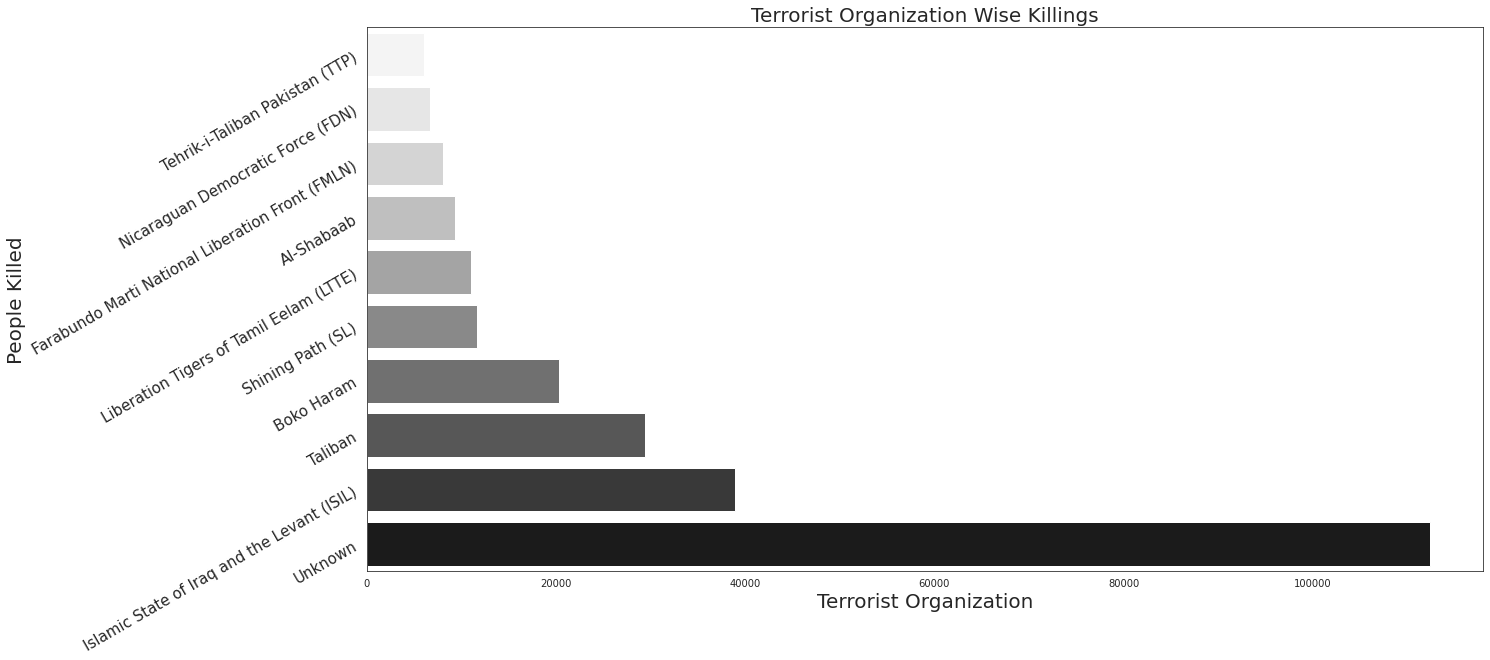

In [184]:
# Plotting Terrorist orginzation wise reported killings

gangwise_kill=gangwise_kill.head(10).sort_values(by='Killed',ascending=True)
plt.subplots(figsize=(20,10))
sns.barplot(x ='Killed', y='Terrorist_Group', data = gangwise_kill, palette='Greys')
plt.title('Terrorist Organization Wise Killings',size=20)
plt.ylabel('People Killed',size=20)
plt.xlabel('Terrorist Organization',size=20)
plt.yticks(size=15,rotation=30)
plt.show()

# **Observations**
# **Known terrorist organizations: 3536**
## **More than 27% killings are from Unknown terrorist organizations / individuals. Possibly no terrorist organization / individual claimed responsibilty of these killings.**
## After the Unknown type of attackers Islamic state of Iraq and the levant (ISIL) and Taliban are the terrorist orgnizations reponsible for highest number of killings, both combinely contribute to more than **21%** of total killings


---



# **Lets find out what are most favourite targets of terrorists**

In [185]:
target_type_Freq=new_df.groupby('Target_Group')['eventid'].count().reset_index()
target_type_Freq.head()

,Target_Group,eventid
0,Abortion Related,263
1,Airports & Aircraft,1343
2,Business,20669
3,Educational Institution,4322
4,Food or Water Supply,317


In [186]:
target_dict={} #We'll use this dict to generate the wordcloud
for Target_Group,eventid in zip(target_type_Freq.Target_Group,target_type_Freq.eventid):
  target_dict[Target_Group]=eventid

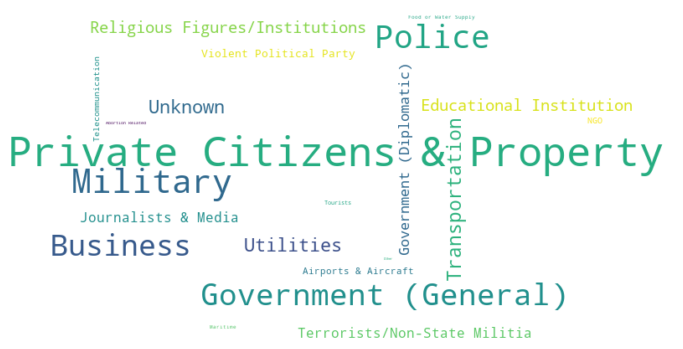

In [187]:
#Wordcloud of type of tagets

wordcloud = WordCloud(background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=target_dict,max_font_size=200)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



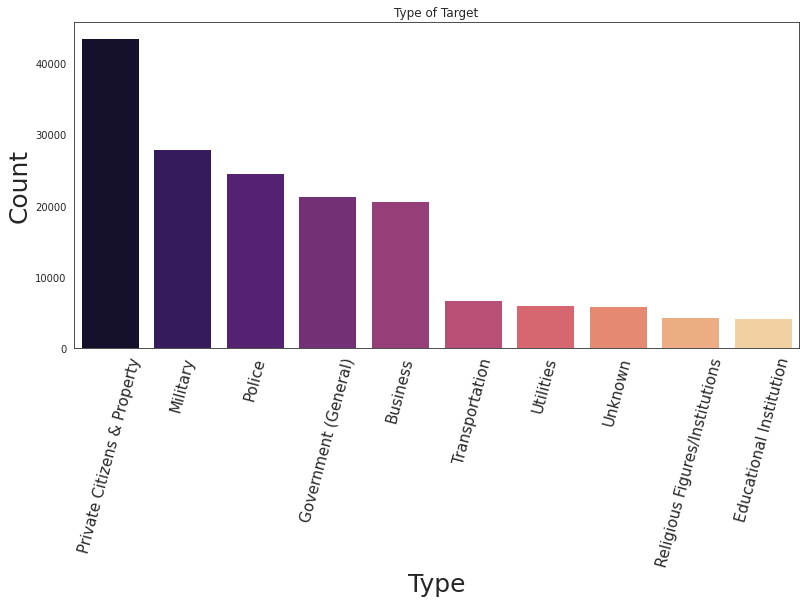

In [188]:
#Finding type of target
plt.figure(figsize=(13,6))
sns.countplot(new_df['Target_Group'],order=new_df['Target_Group'].value_counts()[:10].index,
palette='magma')
plt.xticks(rotation=75,size=15)
plt.xlabel('Type',size=25)
plt.ylabel('Count',size=25)
plt.title('Type of Target')
plt.show()

## From above plot we can see Private Citizens & properties, Military and Police are the top 3 favourite targets by terrorists


---



# **Explore type of attacks and correlations**

In [189]:
# Basic information on type of attacks
new_df.Type_Of_Attack.describe()

count                181691
unique                    8
top       Bombing/Explosion
freq                  88255
Name: Type_Of_Attack, dtype: object

In [190]:
# Create a new df with type of attacks and its occurance frequency
distribution_attack_wise = pd.DataFrame({'Type_Of_Attack': new_df['Type_Of_Attack'].value_counts().index,
                                        'number_of_attacks': new_df['Type_Of_Attack'].value_counts().values})
distribution_attack_wise

,Type_Of_Attack,number_of_attacks
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking,12149
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hijacking,659


# **Observations**
## From above graph it very evident almost half of attacks are Bombing and explosion types, followed by armed assault and assassinations in 2nd and 3rd place resepectively


---


In [191]:
year_attacktype_Wise_killings=new_df.groupby(['Year','Type_Of_Attack'])['Killed'].sum().unstack()

Text(0.5, 0, 'Year')

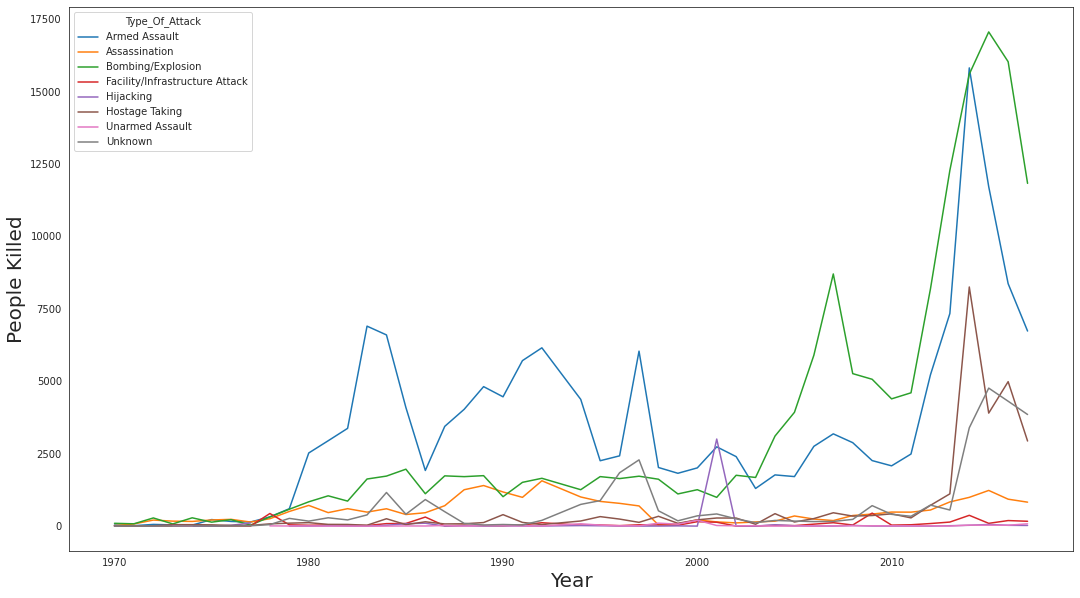

In [192]:
year_attacktype_Wise_killings.plot(kind='line',figsize=(18,10))
plt.ylabel('People Killed',size=20)
plt.xlabel('Year',size=20)

# **Observations** : Year on Year trend of killings from various types of attacks

## Before 2000-2002 Armed assault was prominent reason for death of people, 2003 onwards Bombing/Explosion became the top reason for death.
## During 2000 to 2002 death due to hijacking were at peak


---



# **Creating a dataframe to further analyze various type of attackes and its consequence**

In [193]:
# Creating a pivot tabled dataframe of Type of attacks and aggregated values of damages against same
attack_type_df = pd.pivot_table(new_df,index=['Type_Of_Attack'], values=['Killed','Wounded','Damage_To_Prop','Success','ransompaid'], aggfunc=np.sum,sort=True).sort_values(by=['Killed','Wounded','Damage_To_Prop','ransompaid','Success'],ascending=False).reset_index()
attack_type_df=pd.merge(attack_type_df, distribution_attack_wise, on='Type_Of_Attack', how='inner') # joining 2x dataframes to add number of attacks
attack_type_df['Success_Percentage'] = round(attack_type_df.Success / attack_type_df.number_of_attacks *100,2)
attack_type_df

,Type_Of_Attack,Damage_To_Prop,Killed,Success,Wounded,ransompaid,number_of_attacks,Success_Percentage
0,Armed Assault,2.012928e+08,160297.0,40345,77366.0,6.099109e+06,42669,94.55
1,Bombing/Explosion,6.992811e+09,157321.0,77530,372686.0,0.000000e+00,88255,87.85
2,Unknown,5.674277e+07,32381.0,6015,14725.0,0.000000e+00,7276,82.67
3,Hostage Taking,7.192057e+07,28709.0,11890,10412.0,5.476196e+08,12149,97.87
4,Assassination,3.520256e+06,24920.0,14615,13887.0,-9.900000e+01,19312,75.68
5,Hijacking,1.012500e+07,3718.0,579,17001.0,1.969842e+06,659,87.86
6,Facility/Infrastructure Attack,8.058166e+08,3642.0,9779,3765.0,0.000000e+00,10356,94.43
7,Unarmed Assault,1.969945e+06,880.0,879,14027.0,0.000000e+00,1015,86.60


In [194]:
# total damages to propery
attack_type_df.Damage_To_Prop.sum()

8144198636.80988

# Visualization of attack types and correlations

Text(0.5, 0, 'People Wounded')

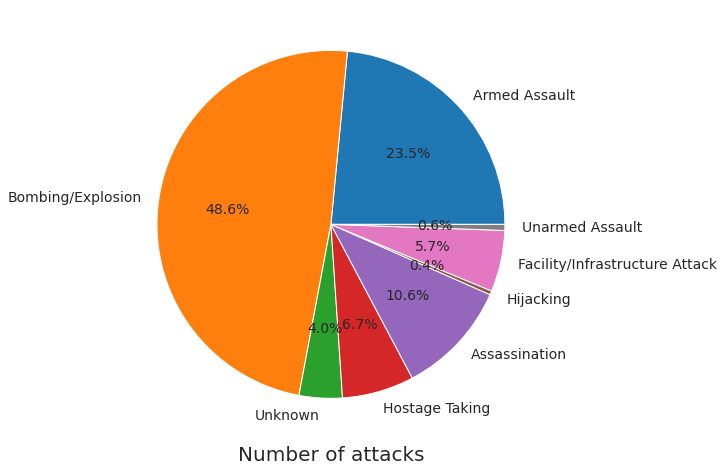

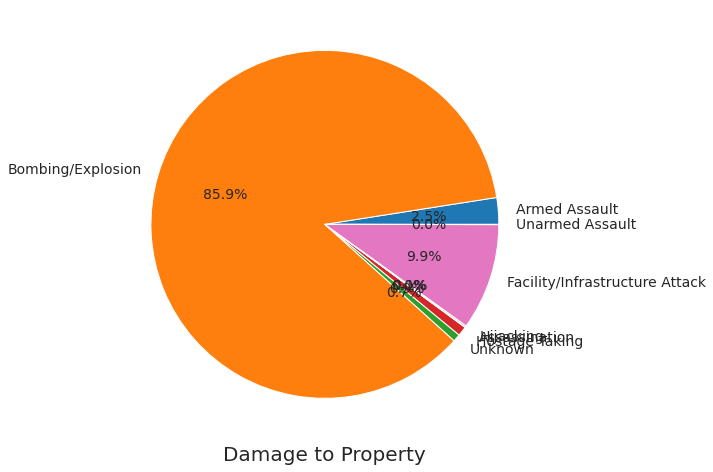

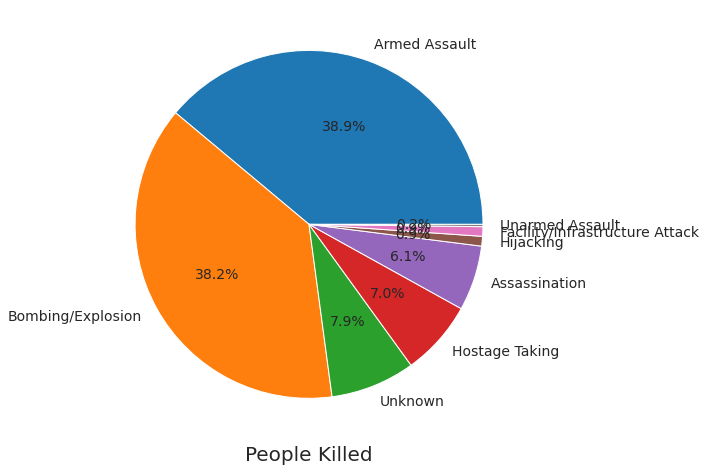

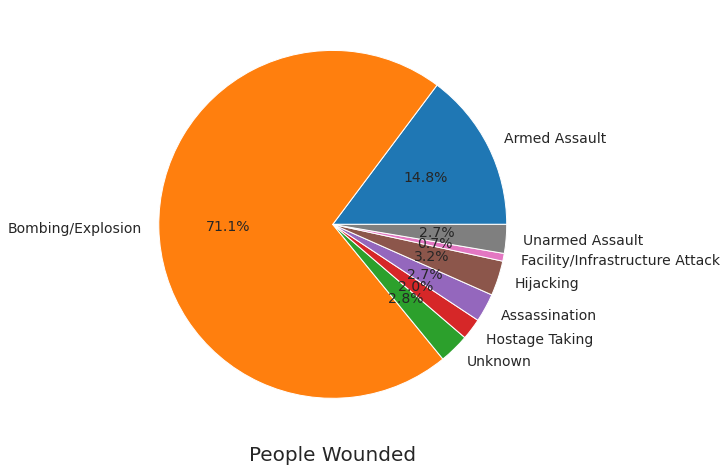

In [195]:
# Plotting pie charts of dataframe created above to visualize impact of different types of attacks on various resources
attack_type_df.plot(labels=attack_type_df.Type_Of_Attack,y='number_of_attacks',kind='pie',autopct='%1.1f%%',figsize = (20,8),subplots=True,legend=False,textprops={'fontsize': 14})
plt.ylabel('',size=20)
plt.xlabel('Number of attacks',size=20)

attack_type_df.plot(labels=attack_type_df.Type_Of_Attack,y='Damage_To_Prop',kind='pie',autopct='%1.1f%%',figsize = (8,8),subplots=True,legend=False,textprops={'fontsize': 14})
plt.ylabel('',size=20)
plt.xlabel('Damage to Property',size=20)

attack_type_df.plot(labels=attack_type_df.Type_Of_Attack,y='Killed',kind='pie',autopct='%1.1f%%',figsize = (8,8),subplots=True,legend=False,textprops={'fontsize': 14})
plt.ylabel('',size=20)
plt.xlabel('People Killed',size=20,rotation=0)

attack_type_df.plot(labels=attack_type_df.Type_Of_Attack,y='Wounded',kind='pie',autopct='%1.1f%%',figsize = (8,8),subplots=True,legend=False,textprops={'fontsize': 14})
plt.ylabel('',size=20)
plt.xlabel('People Wounded',size=20,rotation=0)


# **Observations**
## **Number of attacks**:From above graph it very evident almost half of attacks are Bombing and explosion types, followed by armed assault and assassinations in 2nd and 3rd place resepectively

## **Damage to Property** : almost 86% of property damages are due to bombing and explosions
## **Killed**: Armed assaults and Bombing/Explosions each of these is responsible for more than 38% of reported killings
## **Wounded** : Most Wounded type of casualties are due to bombing which is more than 71% of total reported numbers



---



# Type of attack Vs Casualties (Killings, Wounded)

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 <a list of 7 Text major ticklabel objects>)

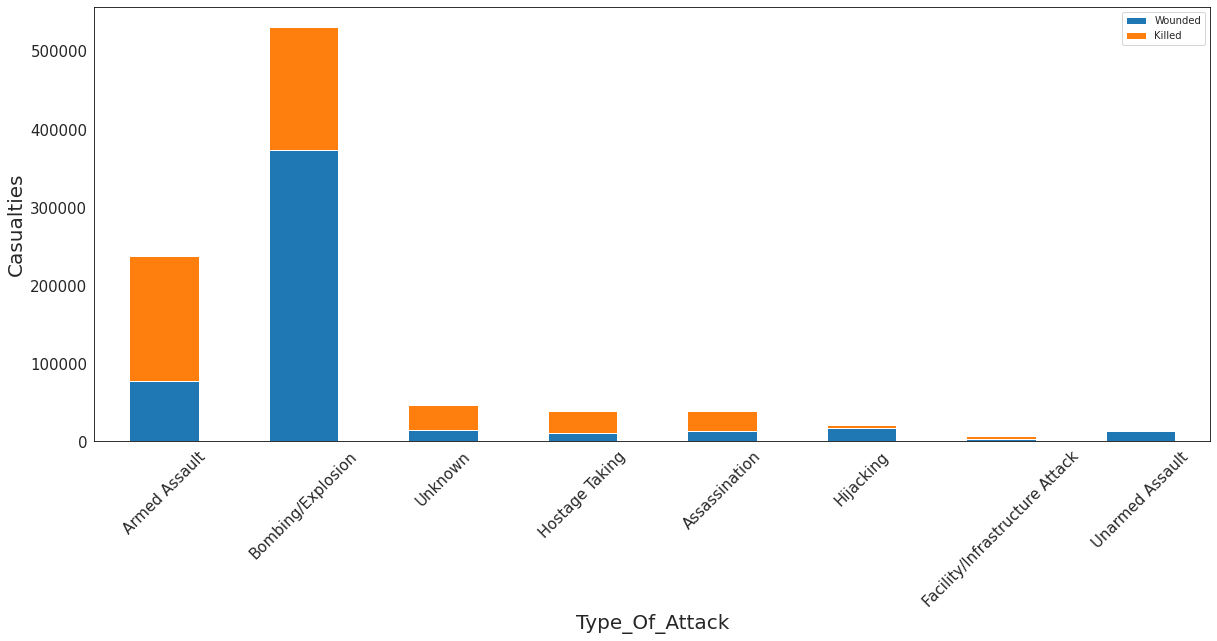

In [196]:
plt.rcParams["axes.edgecolor"] = "black"
attack_type_df.plot(x='Type_Of_Attack',y=['Wounded','Killed'],kind='bar',figsize = (20,8),legend=True,stacked=True)
plt.ylabel('Casualties',size=20)
plt.xlabel('Type_Of_Attack',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# **Observations**
## From above graph we see number of killings from Armed Assault and Bombing/Explosion are nearly equal however, count wounded is much higher from Bombing/Explosion
## With resepct total casualties ration of Killing to Wounded is **~2:1** from Armed assault 
## With resepct total casualties ration of Killing to Wounded is **~1:2.5** from Bombing/Explosion 



---




# Lets find out success rates of different types of attacks

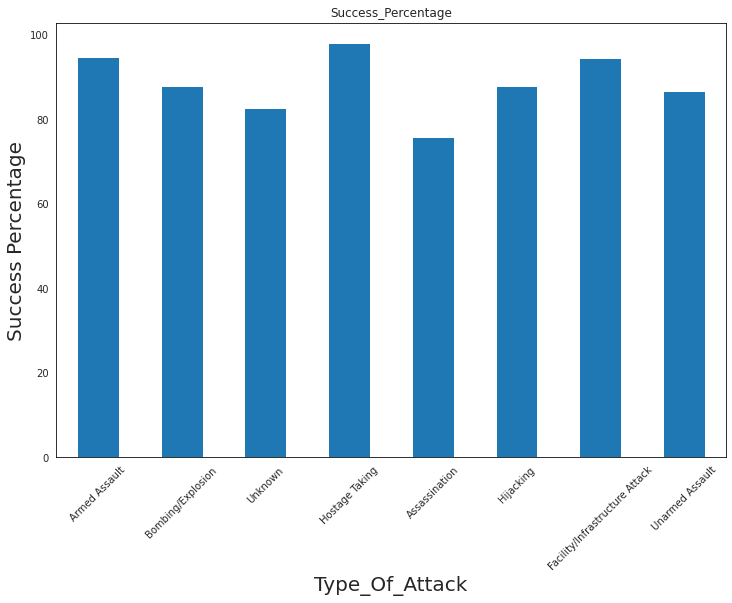

In [197]:
# Plotting bar chart of different attack types and their success percetnage 
attack_type_df.plot(x='Type_Of_Attack',y='Success_Percentage',kind='bar',figsize = (12,8),subplots=True,legend=False)
plt.ylabel('Success Percentage',size=20)
plt.xlabel('Type_Of_Attack',size=20)
plt.xticks(rotation=45)

# Creating a table of different attack types and their success percetnage 
table_global = go.Figure(data=[go.Table(  #tabular representation
    header=dict(values=list(['Type of attack', 'Success' , 'Number of attacks' , ' Success Percentage']),
                fill_color='pink',
                align='center'),
    cells=dict(values=[attack_type_df.Type_Of_Attack, attack_type_df.Success, attack_type_df.number_of_attacks,attack_type_df.Success_Percentage],
               fill_color='lavender',
               align='center'))
])
table_global.update_layout(width=800, height=400)
table_global.show()

# **Heatmaps**

# **We have seen Bombing/Explosion and Armed assault have 2 been most destructive Type of attacks**
## Lets look at the summary of destrutions caused by Bombing/Explosion
> **48.6% of total events**

> **85.6% of total property damages**

> **38.2% of total killing**

> **71.1% of total wounded type casualties**

## Lets look at the summary of destrutions caused by Armed Assault
> **23.5% of total events**

> **38.9% of total killing**

> **14.8% of total wounded type casualties**

# From Heatmap we can analyze different sub types of weapons used (Type of attack)


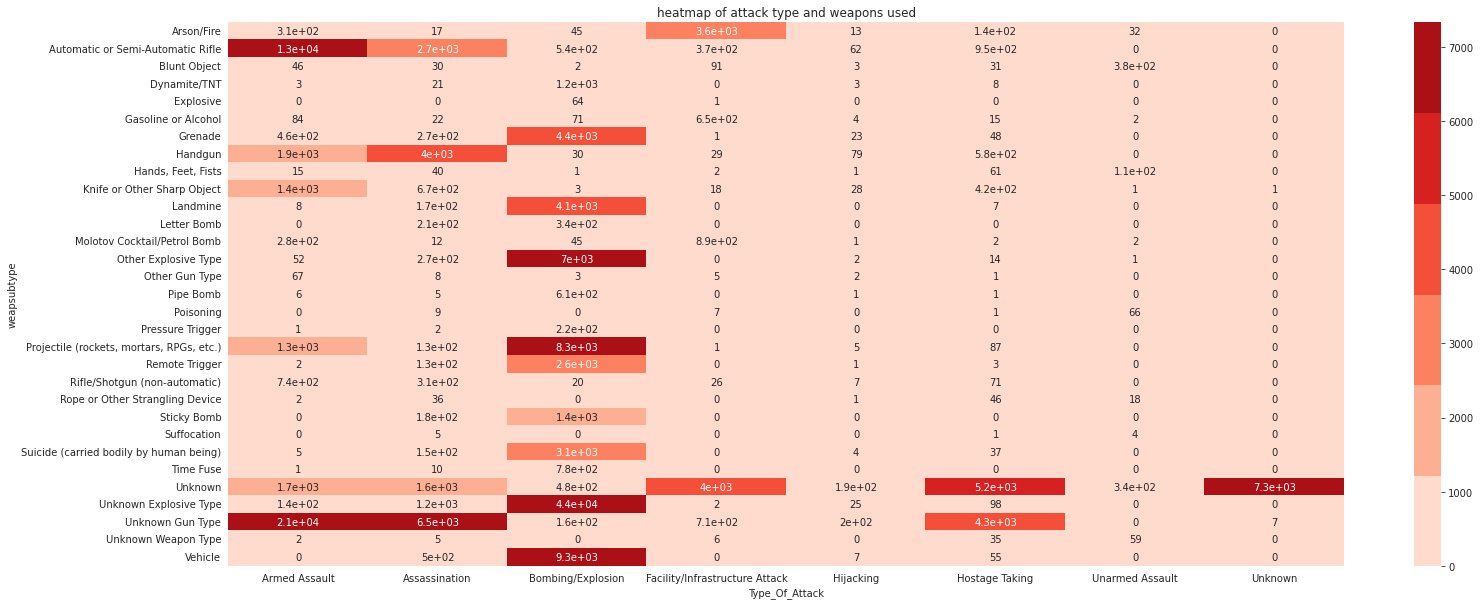

In [198]:
target_group_weap_subtype = new_df.groupby(['weapsubtype'])['Type_Of_Attack'].value_counts().unstack() # Creating a data frame with waponesubtype and count type of attacks
target_group_weap_subtype.fillna(0,inplace=True) # Replacing nan values with 0
target_group_weap_subtype
colormap = sns.color_palette("Reds") # coloring
plt.figure(figsize=(25,10)) # Defining size
plt.title('heatmap of attack type and weapons used')
sns.heatmap(target_group_weap_subtype, vmin=0 , cmap=colormap, annot=True, robust= True) # Plotting heatmap

# Prominent subtypes of Armed Assault
> Unknown GunType

> Projectile (rockets, morters, RPGs, etc.)

> Handgun

> Automatic or Semi-Automatic Rifle

# Prominent subtypes of Bombing/Explosion
> Vehicle

> Unknown Explosive Type

> Projectile (rockets, morters, RPGs, etc.)

> Other explosive type

> Landmines

> Granades

# Deep Dive into different types of weapons used for different types of attacks

In [199]:
# Creating a dataframe with different type of weapons and aggregated values
weapon_summary = pd.pivot_table(new_df,index=['weapsubtype'], values=['Killed','Wounded','Success'], aggfunc=np.sum,sort=True).sort_values(by=['Killed','Wounded','Success'],ascending=False).reset_index()
weapon_count = pd.DataFrame({'weapsubtype': new_df['weapsubtype'].value_counts().index, # dataframe usage frequency of different types of weapons
                             'Usage_Freq': new_df['weapsubtype'].value_counts().values})
weapon_summary=pd.merge(weapon_summary, weapon_count, on='weapsubtype', how='inner') # marging 2 dataframes
weapon_summary['Success_Percentage'] = round(weapon_summary.Success / weapon_summary.Usage_Freq * 100 ,2) # adding a column of success percentage of of different types of weapons 
weapon_summary

,weapsubtype,Killed,Success,Wounded,Usage_Freq,Success_Percentage
0,Unknown Gun Type,86697.0,30283,40919.0,33137,91.39
1,Automatic or Semi-Automatic Rifle,78175.0,16620,31166.0,17412,95.45
2,Vehicle,57384.0,8433,131914.0,9900,85.18
3,Unknown,47971.0,18544,45839.0,20768,89.29
4,Unknown Explosive Type,37176.0,39739,102732.0,44980,88.35
5,Suicide (carried bodily by human being),28669.0,2609,50333.0,3245,80.40
6,"Projectile (rockets, mortars, RPGs, etc.)",23856.0,9249,29987.0,9848,93.92
7,Knife or Other Sharp Object,9860.0,2254,3719.0,2585,87.20
8,Landmine,9592.0,3699,10796.0,4251,87.01
9,Handgun,7709.0,6035,3755.0,6704,90.02


## Wordcloud to visualize usage frequncye of different types of weapons

In [200]:
weapon_type_freq={} #We'll use this dict to generate the wordcloud
for weapsubtype,Usage_Freq in zip(weapon_summary.weapsubtype,weapon_summary.Usage_Freq):
  weapon_type_freq[weapsubtype]=Usage_Freq

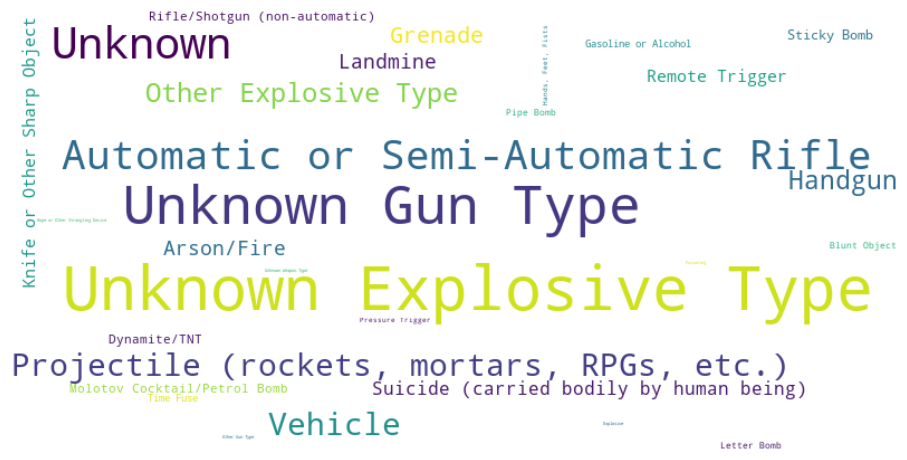

In [201]:
# Plotting a wordcloud of different type of weapons used do visualizae their usage frequency
wordcloud = WordCloud(background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=weapon_type_freq)
plt.figure(figsize = (16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## From above worldcloud Unkwown type explosive and guns are most often used weapons. Possibly these weapons are not the conventional types which can be easily identified and categorized.


---



# Analyzing casualties from different types of attacks and weapons

In [202]:
fig_killing_attack_type=px.sunburst(new_df,values='Killed',
                path=['Type_Of_Attack','weapsubtype'],
                color_discrete_sequence=px.colors.qualitative.Dark24)
fig_killing_attack_type.update_layout(margin=dict(t=8, b=8, r=8, l=8),title_text='Killings from different type of attacks and subtypes of weapons',title_y=1,overwrite=False) # Updating layout and size
fig_killing_attack_type.show()



# **Observations**
## **Killed**: We had seen in previous pie charts Armed assaults and Bombing/Explosions each of these is responsible for more than 38% of reported killings. Now we can see the specific type of weapons.


> 'Unknown Gun Type' and and 'Automatic or Semi-Automatic Rifle' which are subtypes armed assault are responsble for most killings.

>  'Vehicle, 'Unknown Explosive Type' and 'Sucide(carried bodiyly by human beings)' , 'Projectile (rockets,morters,RPGs etc.)' which sibtypes of Bombing/Explosion are subsequently  responsibl for the killings


In [203]:
plt.rcParams["figure.figsize"]=20,20  # creating a sunburst plot of attack and weapon type against count of wounded
fig_wounded_attack_type=px.sunburst(new_df,values='Wounded',
                path=['Type_Of_Attack','weapsubtype'],
                color_discrete_sequence=px.colors.qualitative.Dark24,
                title='Wounded from different type of attacks and subtypes of weapons')
fig_wounded_attack_type.update_layout(margin=dict(t=10, b=10, r=10, l=10),title_text='Wounded from different type of attacks and subtypes of weapons',title_y=1,overwrite=False)
fig_wounded_attack_type.show()


# **Observations**

## **Wounded** : We had seen in previous pie charts most Wounded type of casualties are due to Bombing/Explosion (more than 71%)
> We now see different subtypes of weapons responsble for Wounded type casualties and subtypes of Bombing/Explosion cover most aree of pie chart


---








# **Conlusions**

#'Middle east & North africa' is the most attacked region countributing **27.78%** of reported events and **33.42%** of reported killings
##From 'Middle east & North africa' as well as world 'Iraq' is most atacked coutnry contributing **13.55%** of reported events and 19.08% of reported killings globally
## **'Iraq' alone contributes to **48.8%** events and **57.1%** killings reported out of **23** countries in 'Middle east & North africa'**


---


# Out of 205 countries top 10 countries have reported 61.7% of total killings
#**Contradictory observations** :  Phillipines, United Kingdom , Turkey these are 3 countries though in top 10 attacked countries, these countries are not in top 10 in terms of killings. 
#Nigeria, Sri Lanka, Syria though not in top 10 attacked countries, these are 4th, 6th and 7th highest countries with reported killings.



---



# Private Citizens & properties, Military and Police are the top 3 favourite targets by terrorists



---



# Out of **3536** known terrorist organizations more than **27%** killings are from Unknown terrorist organizations / individuals which is big concern. 
# After the Unknown type of attackers Islamic state of Iraq and the levant (ISIL) and Taliban are the terrorist orgnizations reponsible for highest number of killings, both combinely contribute to more than **21%** of total killings



---



## Lets look at the summary of destrutions caused by Bombing/Explosion
> **48.6% of total events**

> **85.6% of total property damages**

> **38.2% of total killing**

> **71.1% of total wounded type casualties**

> **'Vehicle, 'Unknown Explosive Type' and 'Sucide(carried bodiyly by human beings)' , 'Projectile (rockets,morters,RPGs etc.)' prominent types of Bombing/Explosions**


---



## Lets look at the summary of destrutions caused by Armed Assault
> **23.5% of total events**

> **38.9% of total killing**

> **14.8% of total wounded type casualties**

> **'Unknown Gun Type' and and 'Automatic or Semi-Automatic Rifle' prominent types of weapons used for Armed Assaults**


